In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/K4zxDdv3-cdJng'
zip_dir = tf.keras.utils.get_file('test23.zip', origin=_URL, extract=True)

202506734/202506734 [==============================] - 8s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
for root, dirs, files in os.walk(zip_dir_base):
    for directory in dirs:
        print(os.path.join(root, directory))

/root/.keras/datasets/mri
/root/.keras/datasets/mri/Validation
/root/.keras/datasets/mri/Training
/root/.keras/datasets/mri/Testing
/root/.keras/datasets/mri/Validation/glioma
/root/.keras/datasets/mri/Validation/notumor
/root/.keras/datasets/mri/Validation/pituitary
/root/.keras/datasets/mri/Validation/meningioma
/root/.keras/datasets/mri/Training/glioma
/root/.keras/datasets/mri/Training/notumor
/root/.keras/datasets/mri/Training/pituitary
/root/.keras/datasets/mri/Training/meningioma
/root/.keras/datasets/mri/Testing/glioma
/root/.keras/datasets/mri/Testing/notumor
/root/.keras/datasets/mri/Testing/pituitary
/root/.keras/datasets/mri/Testing/meningioma


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'mri')
train_dir = os.path.join(base_dir,'Training')
train_glioma_dir = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_notumor_dir = os.path.join(train_dir, 'notumor')
train_pituitary_dir = os.path.join(train_dir, 'pituitary')

val_dir = os.path.join(base_dir,'Validation')
val_glioma_dir = os.path.join(val_dir, 'glioma')
val_meningioma_dir = os.path.join(val_dir, 'meningioma')
val_notumor_dir = os.path.join(val_dir, 'notumor')
val_pituitary_dir = os.path.join(val_dir, 'pituitary')

test_dir = os.path.join(base_dir,'Testing')
test_glioma_dir = os.path.join(test_dir, 'glioma')
test_meningioma_dir = os.path.join(test_dir, 'meningioma')
test_notumor_dir = os.path.join(test_dir, 'notumor')
test_pituitary_dir = os.path.join(test_dir, 'pituitary')

In [ ]:
num_glioma_tr = len(os.listdir(train_glioma_dir))
num_meningioma_tr = len(os.listdir(train_meningioma_dir))
num_notumor_tr = len(os.listdir(train_notumor_dir))
num_pituitary_tr = len(os.listdir(train_pituitary_dir))

total_train = num_glioma_tr+num_meningioma_tr+num_notumor_tr+num_pituitary_tr

num_glioma_val = len(os.listdir(val_glioma_dir))
num_meningioma_val = len(os.listdir(val_meningioma_dir))
num_notumor_val = len(os.listdir(val_notumor_dir))
num_pituitary_val = len(os.listdir(val_pituitary_dir))

total_val = num_glioma_val+num_meningioma_val+num_notumor_val+num_pituitary_val

num_glioma_test = len(os.listdir(test_glioma_dir))
num_meningioma_test = len(os.listdir(test_meningioma_dir))
num_notumor_test = len(os.listdir(test_notumor_dir))
num_pituitary_test = len(os.listdir(test_pituitary_dir))

total_test = num_glioma_test+num_meningioma_test+num_notumor_test+num_pituitary_test

In [ ]:
print('num_glioma_tr: ', num_glioma_tr)
print('num_meningioma_tr: ', num_meningioma_tr)
print('num_notumor_tr: ', num_notumor_tr)
print('num_pituitary_tr: ', num_pituitary_tr)
print('--')
print('Всего изображений в тренировочном наборе данных: ', total_train)
print('num_glioma_val: ', num_glioma_val)
print('num_meningioma_val: ', num_meningioma_val)
print('num_notumor_val: ', num_notumor_val)
print('num_pituitary_val: ', num_pituitary_val)
print('--')
print('Всего изображений в валидационном наборе данных: ', total_val)
print('num_glioma_test: ', num_glioma_test)
print('num_meningioma_test: ', num_meningioma_test)
print('num_notumor_test: ', num_notumor_test)
print('num_pituitary_test: ', num_pituitary_test)
print('--')
print('Всего изображений в тестовом наборе данных: ', total_test)

num_glioma_tr:  1321
num_meningioma_tr:  1339
num_notumor_tr:  1595
num_pituitary_tr:  1457
--
Всего изображений в тренировочном наборе данных:  5712
num_glioma_val:  300
num_meningioma_val:  306
num_notumor_val:  291
num_pituitary_val:  300
--
Всего изображений в валидационном наборе данных:  1197
num_glioma_test:  317
num_meningioma_test:  256
num_notumor_test:  290
num_pituitary_test:  255
--
Всего изображений в тестовом наборе данных:  1118


In [ ]:
BATCH_SIZE = 50
IMG_SHAPE = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')

Found 1197 images belonging to 4 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='categorical')

Found 1118 images belonging to 4 classes.


In [ ]:
sample_training_images, y = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

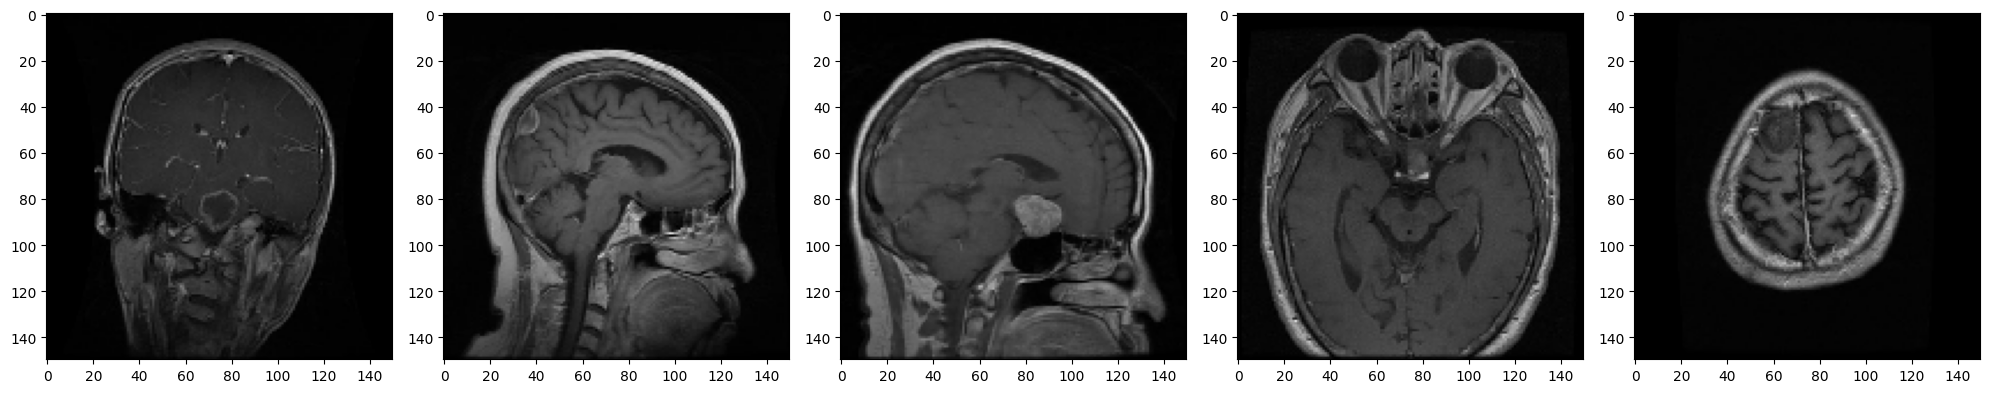

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])

In [ ]:

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.build((None, 150, 150, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 256)               17280256  
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 17281284 (65.92 MB)
Trainable params: 17281284 (65.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = model.fit(train_data_gen, epochs=12,
                    validation_data=val_data_gen)

Epoch 1/12
115/115 [==============================] - 56s 474ms/step - loss: 2.4147 - accuracy: 0.6264 - val_loss: 1.1101 - val_accuracy: 0.6449
Epoch 2/12
115/115 [==============================] - 54s 470ms/step - loss: 0.5924 - accuracy: 0.7901 - val_loss: 0.7121 - val_accuracy: 0.7586
Epoch 3/12
115/115 [==============================] - 55s 480ms/step - loss: 0.5427 - accuracy: 0.8055 - val_loss: 0.6588 - val_accuracy: 0.7845
Epoch 4/12
115/115 [==============================] - 54s 468ms/step - loss: 0.4383 - accuracy: 0.8423 - val_loss: 0.7266 - val_accuracy: 0.7678
Epoch 5/12
115/115 [==============================] - 55s 480ms/step - loss: 0.3879 - accuracy: 0.8613 - val_loss: 0.5361 - val_accuracy: 0.7920
Epoch 6/12
115/115 [==============================] - 55s 477ms/step - loss: 0.3718 - accuracy: 0.8682 - val_loss: 0.5014 - val_accuracy: 0.8237
Epoch 7/12
115/115 [==============================] - 55s 480ms/step - loss: 0.4190 - accuracy: 0.8426 - val_loss: 0.4909 - val_ac

23/23 [==============================] - 4s 186ms/step - loss: 4.9583 - accuracy: 0.5394


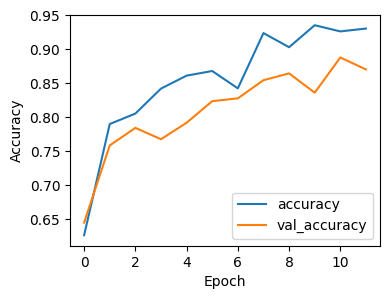

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data_gen)

In [ ]:
scores = model.evaluate(test_data_gen, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

23/23 [==============================] - 3s 145ms/step - loss: 4.9583 - accuracy: 0.5394
Доля верных ответов на тестовых данных, в процентах: 53.9356


In [ ]:
test_images, y = next(test_data_gen)

In [ ]:
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [ ]:
y_pred=model.predict(test_images)

2/2 [==============================] - 0s 21ms/step


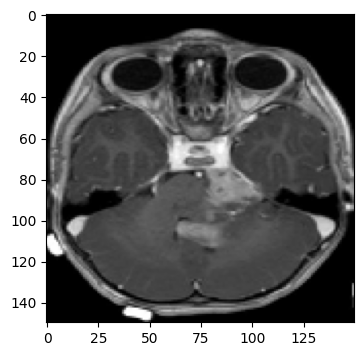

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(test_images[5])

In [ ]:
k=round(y_pred[5][0])
class_names[k]

'meningioma_tumor'

2/2 [==============================] - 0s 27ms/step


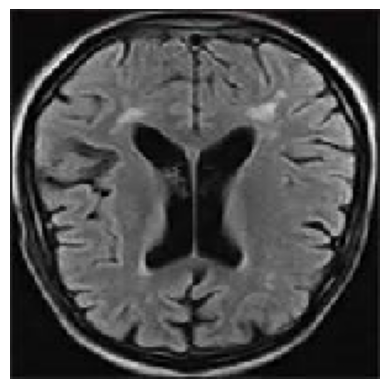

Predicted class: notumor
Actual class: notumor


In [ ]:
def visualize_image_and_prediction(model, test_data_gen):
    test_batch, test_labels_batch = next(test_data_gen)
    predictions = model.predict(test_batch)

    class_names = list(test_data_gen.class_indices.keys())

    image_index = np.random.randint(0, len(test_batch))
    predicted_class_index = np.argmax(predictions[image_index])
    actual_class_index = np.argmax(test_labels_batch[image_index])

    plt.imshow(test_batch[image_index])
    plt.axis('off')
    plt.show()

    print("Predicted class:", class_names[predicted_class_index])
    print("Actual class:", class_names[actual_class_index])

visualize_image_and_prediction(model, test_data_gen)